In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [5]:
AA="C:/Users/ganes/oneDrive/Desktop/AI/FD/FDCF.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1544, 22)

In [6]:
A=df['Al2O3/Si']
B=df["B2O3/Si"]
C = df['BeO/Si']
D = df['Ga2O3/Si']
E = df["GeO2/Si"]
F=df['Li2O/Si']
G=df["K2O/Si"]
H = df['Na2O/Si']
I = df['Rb2O/Si']
J=df['Cs2O/Si']
K=df["SrO/Si"]
L = df['H2O/Si']
M=df['F/Si']
N= df['OSDA-1/Si']
O= df['OSDA-2/Si']
P=df["OH/Si"]
Q=df["Area-1"]
R=df["Area-2"]
S=df["T"]
T=df["t"]
U=df["rpm"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(1544, 21)

In [7]:
X_OS=List1
Y_OS=df["CD"]

train accuracy 0.9791287661015897
test accuracy 0.8594344365312108
train precision 0.9709528170758942
test precision 0.8387519953113693
train recall 0.9734270811326894
test recall 0.8220880471418216
train f1 0.9721428696119757
test f1 0.8266832882691137
train               precision    recall  f1-score   support

           0       0.97      0.99      0.98        79
           1       0.96      0.95      0.96       230
           2       0.99      0.99      0.99       427
           3       0.99      0.99      0.99       654

    accuracy                           0.98      1390
   macro avg       0.98      0.98      0.98      1390
weighted avg       0.98      0.98      0.98      1390

test               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.72      0.72      0.72        25
           2       0.89      0.85      0.87        48
           3       0.89      0.92      0.91        73

    accuracy                

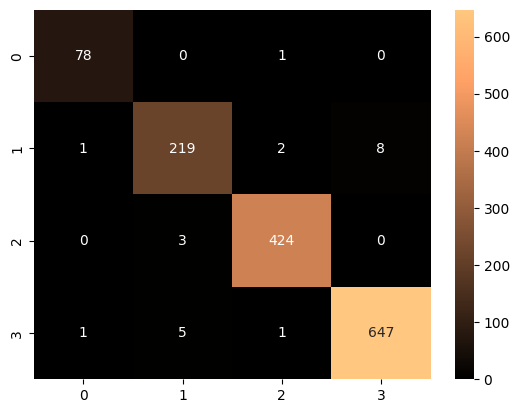

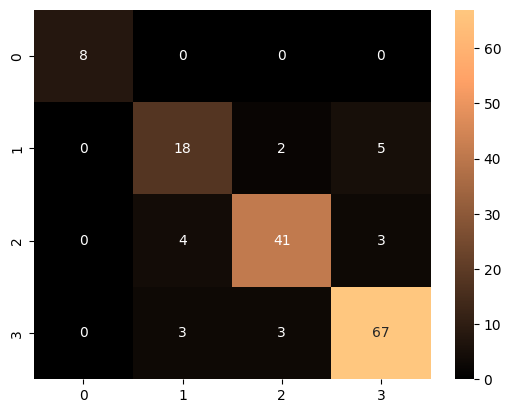

In [8]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gbtrain=list()
mmc_gbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
GB = GradientBoostingClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=10, n_estimators=40,learning_rate=0.9, 
                                min_samples_split=4,)                             
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_gbtest)
    mmc_gbtrain.append(mmc_train)
    mmc_gbtest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient Train',mean(mmc_gbtrain))
print('Matthews correlation coefficient Test',mean(mmc_gbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.9858950334332965
test accuracy 0.8807582739840806
train precision 0.9806413164431023
test precision 0.867318892738929
train recall 0.9804813218107155
test recall 0.8379186695214822
train f1 0.9805435432971711
test f1 0.8486199702849214
train               precision    recall  f1-score   support

           0       0.97      0.97      0.97        79
           1       0.97      0.96      0.96       230
           2       0.99      0.99      0.99       427
           3       0.99      0.99      0.99       654

    accuracy                           0.99      1390
   macro avg       0.98      0.98      0.98      1390
weighted avg       0.99      0.99      0.99      1390

test               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      0.80      0.80        25
           2       0.86      0.92      0.89        48
           3       0.93      0.90      0.92        73

    accuracy                 

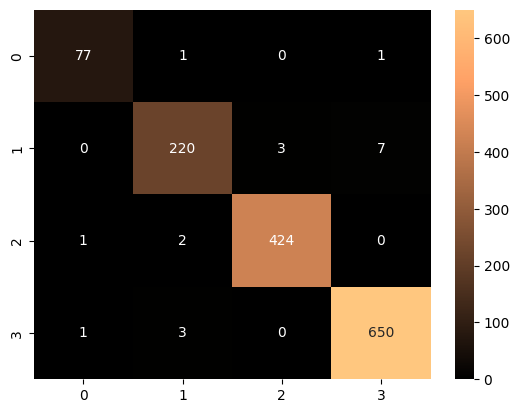

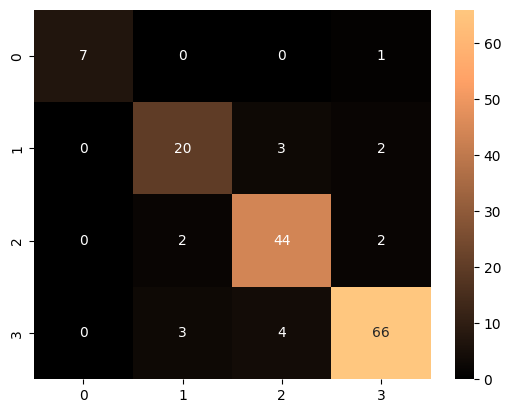

In [9]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=10, learning_rate=0.9, 
                    alpha=0.7, min_child_weight=0.1, max_delta_step=0.1,  )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtrain.append(mmc_train)
    mmc_xgbtest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient Train',mean(mmc_xgbtrain))
print('Matthews correlation coefficient Test',mean(mmc_xgbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


100%|===================| 5559/5560 [01:17<00:00]        

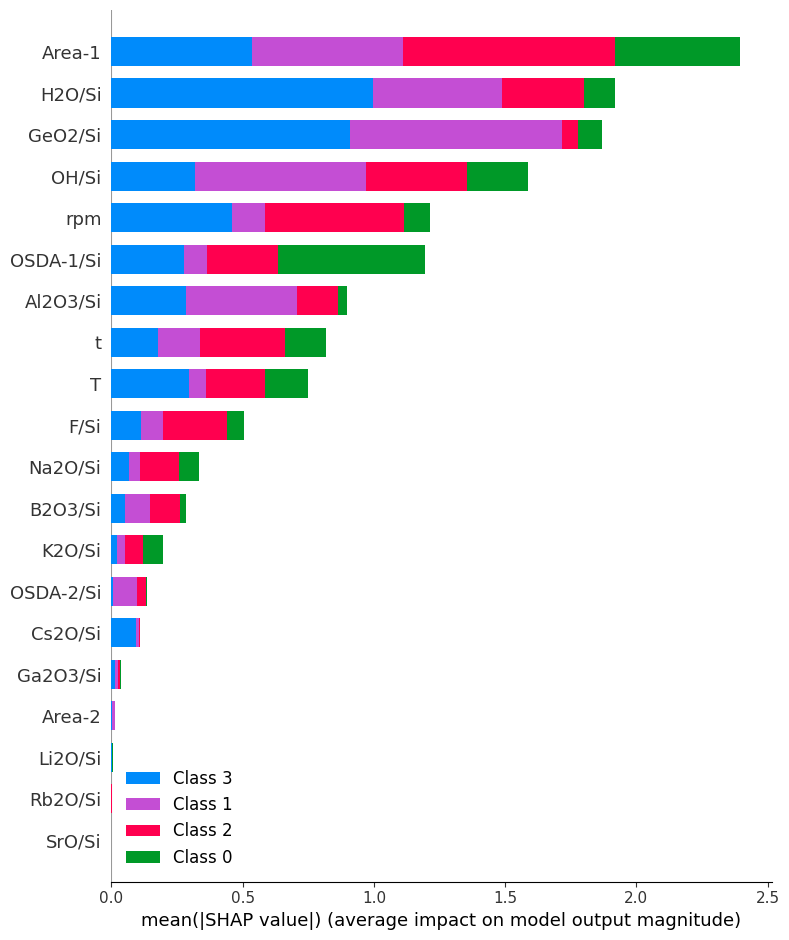

In [10]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

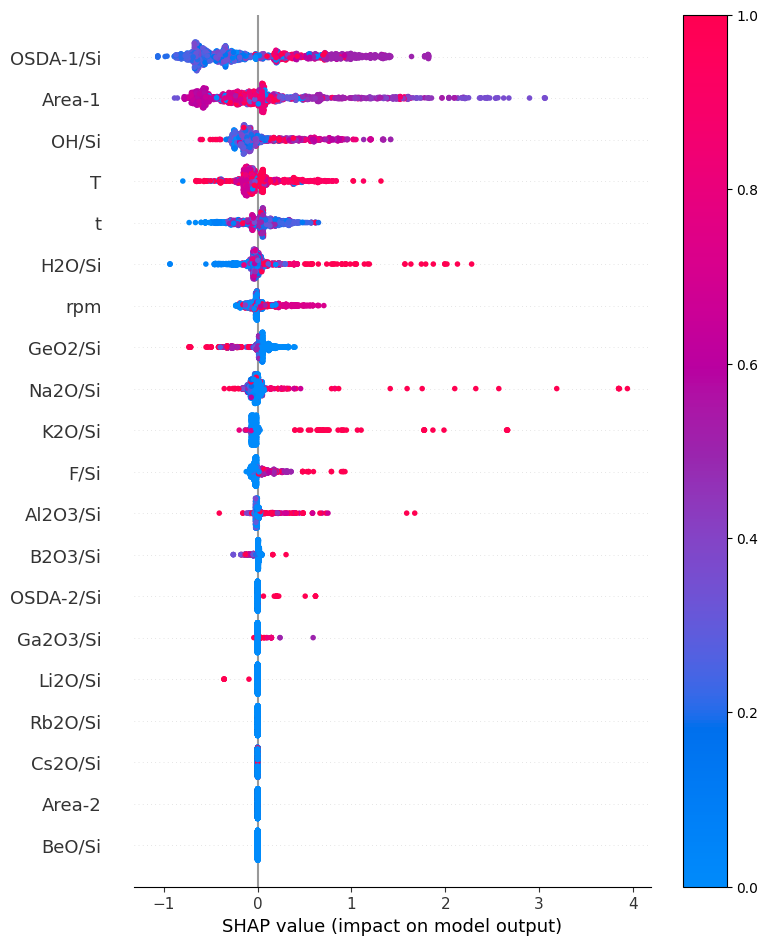

In [15]:
shap.summary_plot(shap_values_XGB[0], X_Train, show = False, color_bar = False,)
plt.colorbar()

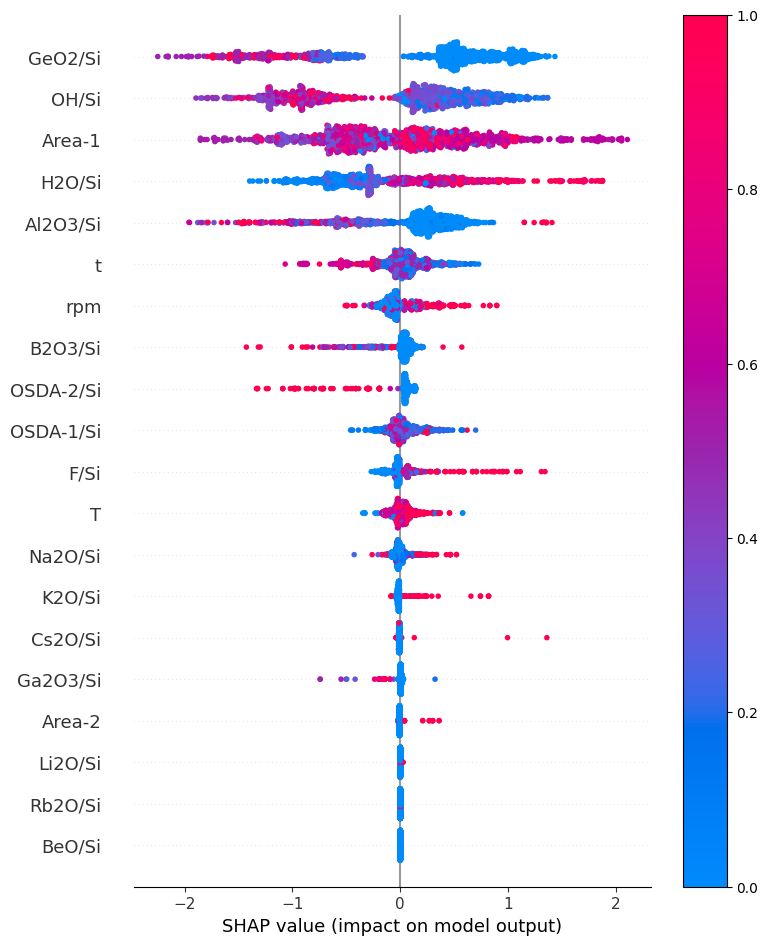

In [12]:
shap.summary_plot(shap_values_XGB[1], X_Train, show = False, color_bar = False,)
plt.colorbar()

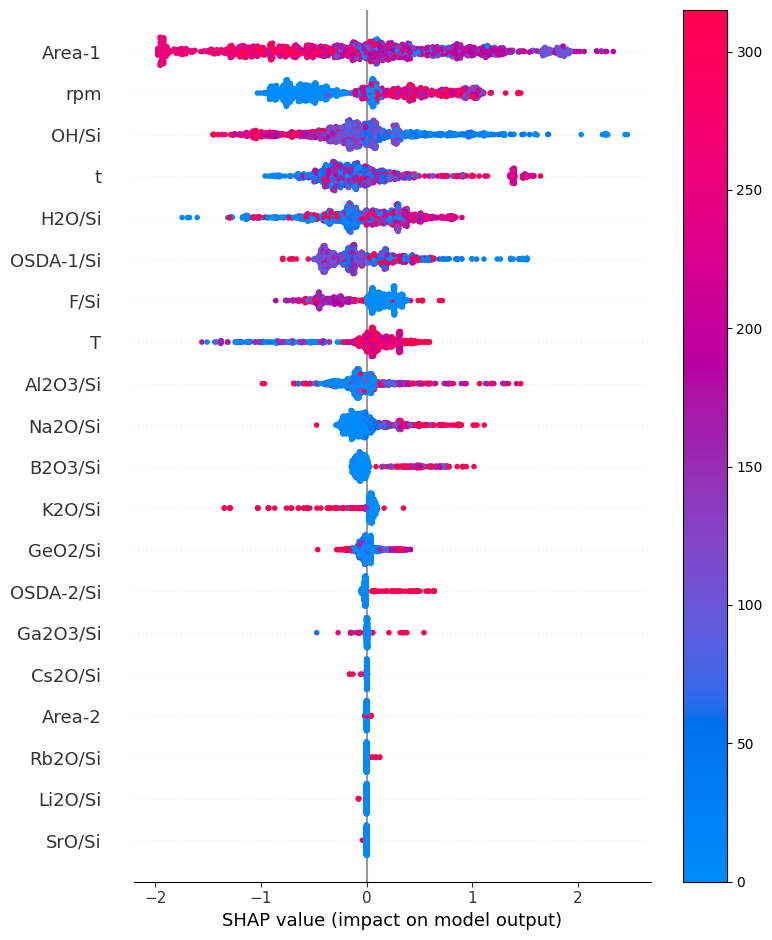

In [13]:
shap.summary_plot(shap_values_XGB[2], X_Train, show = False, color_bar = False,)
plt.colorbar()

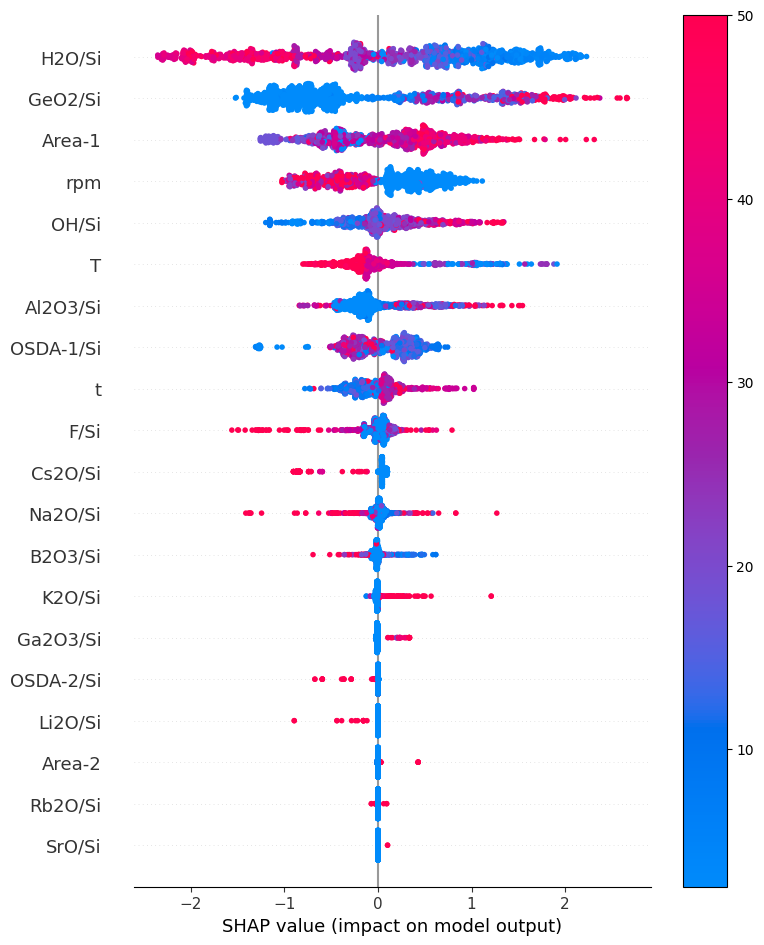

In [14]:
shap.summary_plot(shap_values_XGB[3], X_Train, show = False, color_bar = False,)
plt.colorbar()